In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

# GENERAL PLOT OPTIONS
# GENERAL PLOT OPTIONS
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
matplotlib.rcParams['xtick.bottom'] = True
matplotlib.rcParams['xtick.labelsize'] = 18
matplotlib.rcParams['xtick.top'] = False
matplotlib.rcParams['ytick.right'] = False
matplotlib.rcParams['ytick.labelsize'] = 18
matplotlib.rcParams['ytick.major.size'] = 6
matplotlib.rcParams['ytick.major.width'] = 1.2
matplotlib.rcParams['ytick.minor.size'] = 3
matplotlib.rcParams['ytick.minor.width'] = 0.8
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.linewidth'] = '1.0'
matplotlib.rcParams['axes.labelsize'] = 18
matplotlib.rcParams['axes.titlesize'] = 24
matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.linewidth'] = '0.0'
matplotlib.rcParams['grid.alpha'] = '0.18'
matplotlib.rcParams['grid.color'] = 'lightgray'
matplotlib.rcParams['legend.labelspacing'] = 0.77
matplotlib.rcParams['legend.fontsize'] = 14
matplotlib.rcParams['legend.title_fontsize'] = 18
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['savefig.dpi'] = 300

from scipy.interpolate import interp1d
from scipy.integrate import quad

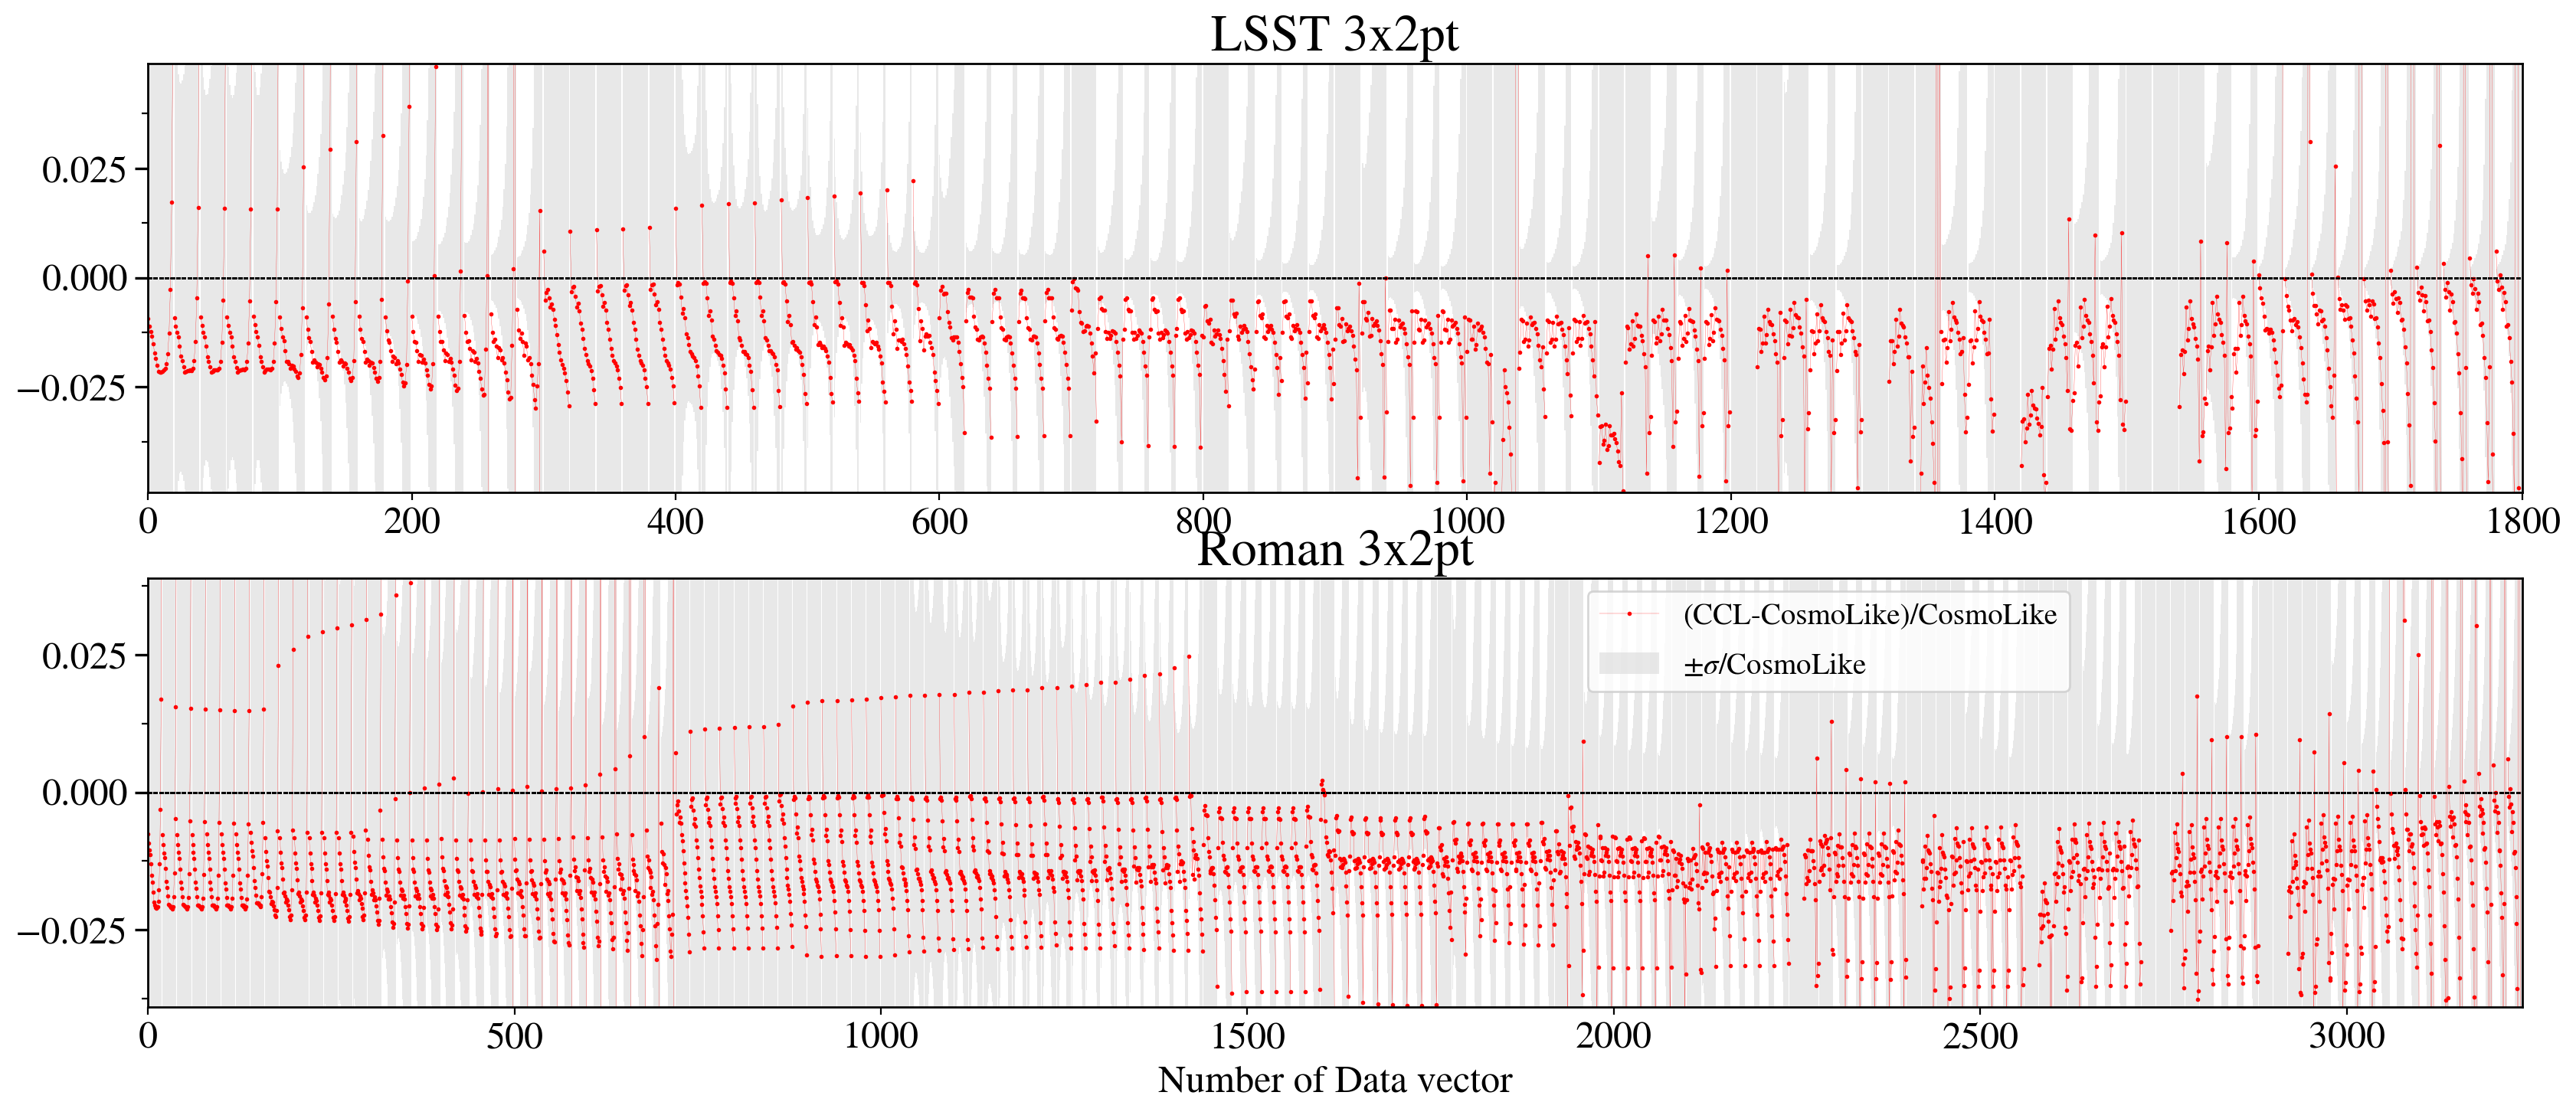

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

#load LSST data
import numpy as np

nlens = 5
nsrcs = 4
ntheta=20
tmin = 2.5
tmax = 250

dvF_file = './data/desy3.modelvector'
dvC_file = './data/desy3_fixed.modelvector'
sigmas_file = './data/lsst_real/sigmas.npy'
mask_file = './data/lsst_real/lsst_Y3.mask'

dvF = np.loadtxt(dvF_file)
dvC = np.loadtxt(dvC_file)[:,1]
mask = np.loadtxt(mask_file)[:,1]
sigmas = np.load(sigmas_file)

#define plot function
def plot_assemble(axs, cnt, probe, combo):
    l,r = int(cnt*ntheta), int(cnt+1)*ntheta
    thetas = np.arange(int(cnt)*20, int(cnt+1)*20)
    
    delta = (dvF[l:r] - dvC[l:r])/dvC[l:r]
    axs.plot(thetas, delta, marker='o',color='r',markersize=1,linewidth=0.1)
    sigmas_seg = np.sqrt(sigmas[l:r])
    axs.fill_between(thetas,-sigmas_seg/dvC[l:r],+sigmas_seg/dvC[l:r],step='mid',facecolor='lightgray',alpha=0.5)
    axs.axhline(xmin=0,xmax=1,y=0.0,color='k',linestyle='--',linewidth=0.5)
    axs.set_ylim(-0.1, 0.1)

#assemble
fig,ax = plt.subplots(2,1,figsize=(20,8))
cnt = 0

#initiate legends
l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
plot_assemble(ax[0], cnt, probe=r'$\xi^+$', combo=f'{0}x{0}')
cnt+=1

#start loop
for i in range(nsrcs):
    for j in range(i, nsrcs):
        if(i==0 and j==0):
            continue
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0], cnt, probe=r'$\xi^+$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nsrcs):
    for j in range(i, nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0], cnt, probe=r'$\xi^-$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    for j in range(nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0], cnt, probe=r'$\gamma t$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
    plot_assemble(ax[0], cnt, probe=r'$W(\theta)$', combo=f'{i}x{i}')
    cnt+=1
    
#general settings for plot
ax[0].set_title('LSST 3x2pt')
ax[0].set_xlabel('')
ax[0].set_ylim(-0.049, 0.049)
ax[0].yaxis.set_major_locator(MultipleLocator(0.025))
ax[0].yaxis.set_minor_locator(MultipleLocator(0.0125))
ax[0].set_xlim(0, cnt*ntheta)

#load Roman data
import numpy as np

nlens = 10
nsrcs = 8
ntheta=20
tmin = 1
tmax = 500

dvF_file = './data/roman_real/firecrown_theory.txt'
dvC_file = './data/roman_real/roman_limber+noRSD+takahashi.modelvector'
sigmas_file = './data/roman_real/sigmas.npy'
mask_file = './data/roman_real/roman_Y3.mask'

dvF = np.loadtxt(dvF_file)
dvC = np.loadtxt(dvC_file)[:,1]
mask = np.loadtxt(mask_file)[:,1]
sigmas = np.load(sigmas_file)

#restart whole process
cnt = 0

#start loop
for i in range(nsrcs):
    for j in range(i, nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1], cnt, probe=r'$\xi^+$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nsrcs):
    for j in range(i, nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1], cnt, probe=r'$\xi^-$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    for j in range(nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1], cnt, probe=r'$\gamma t$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
    plot_assemble(ax[1], cnt, probe=r'$W(\theta)$', combo=f'{i}x{i}')
    cnt+=1
    
#general settings for plot
ax[1].set_xlabel('Number of Data vector')
ax[1].set_title('Roman 3x2pt')
ax[1].legend(['(CCL-CosmoLike)/CosmoLike', r'$\pm\sigma$/CosmoLike'],bbox_to_anchor=(0.6,0.7))
ax[1].set_ylim(-0.039, 0.039)
ax[1].set_xlim(0, cnt*ntheta)
ax[1].yaxis.set_major_locator(MultipleLocator(0.025))
ax[1].yaxis.set_minor_locator(MultipleLocator(0.0125))

plt.savefig('data_vector_comparison.jpg',dpi=300)
plt.show()


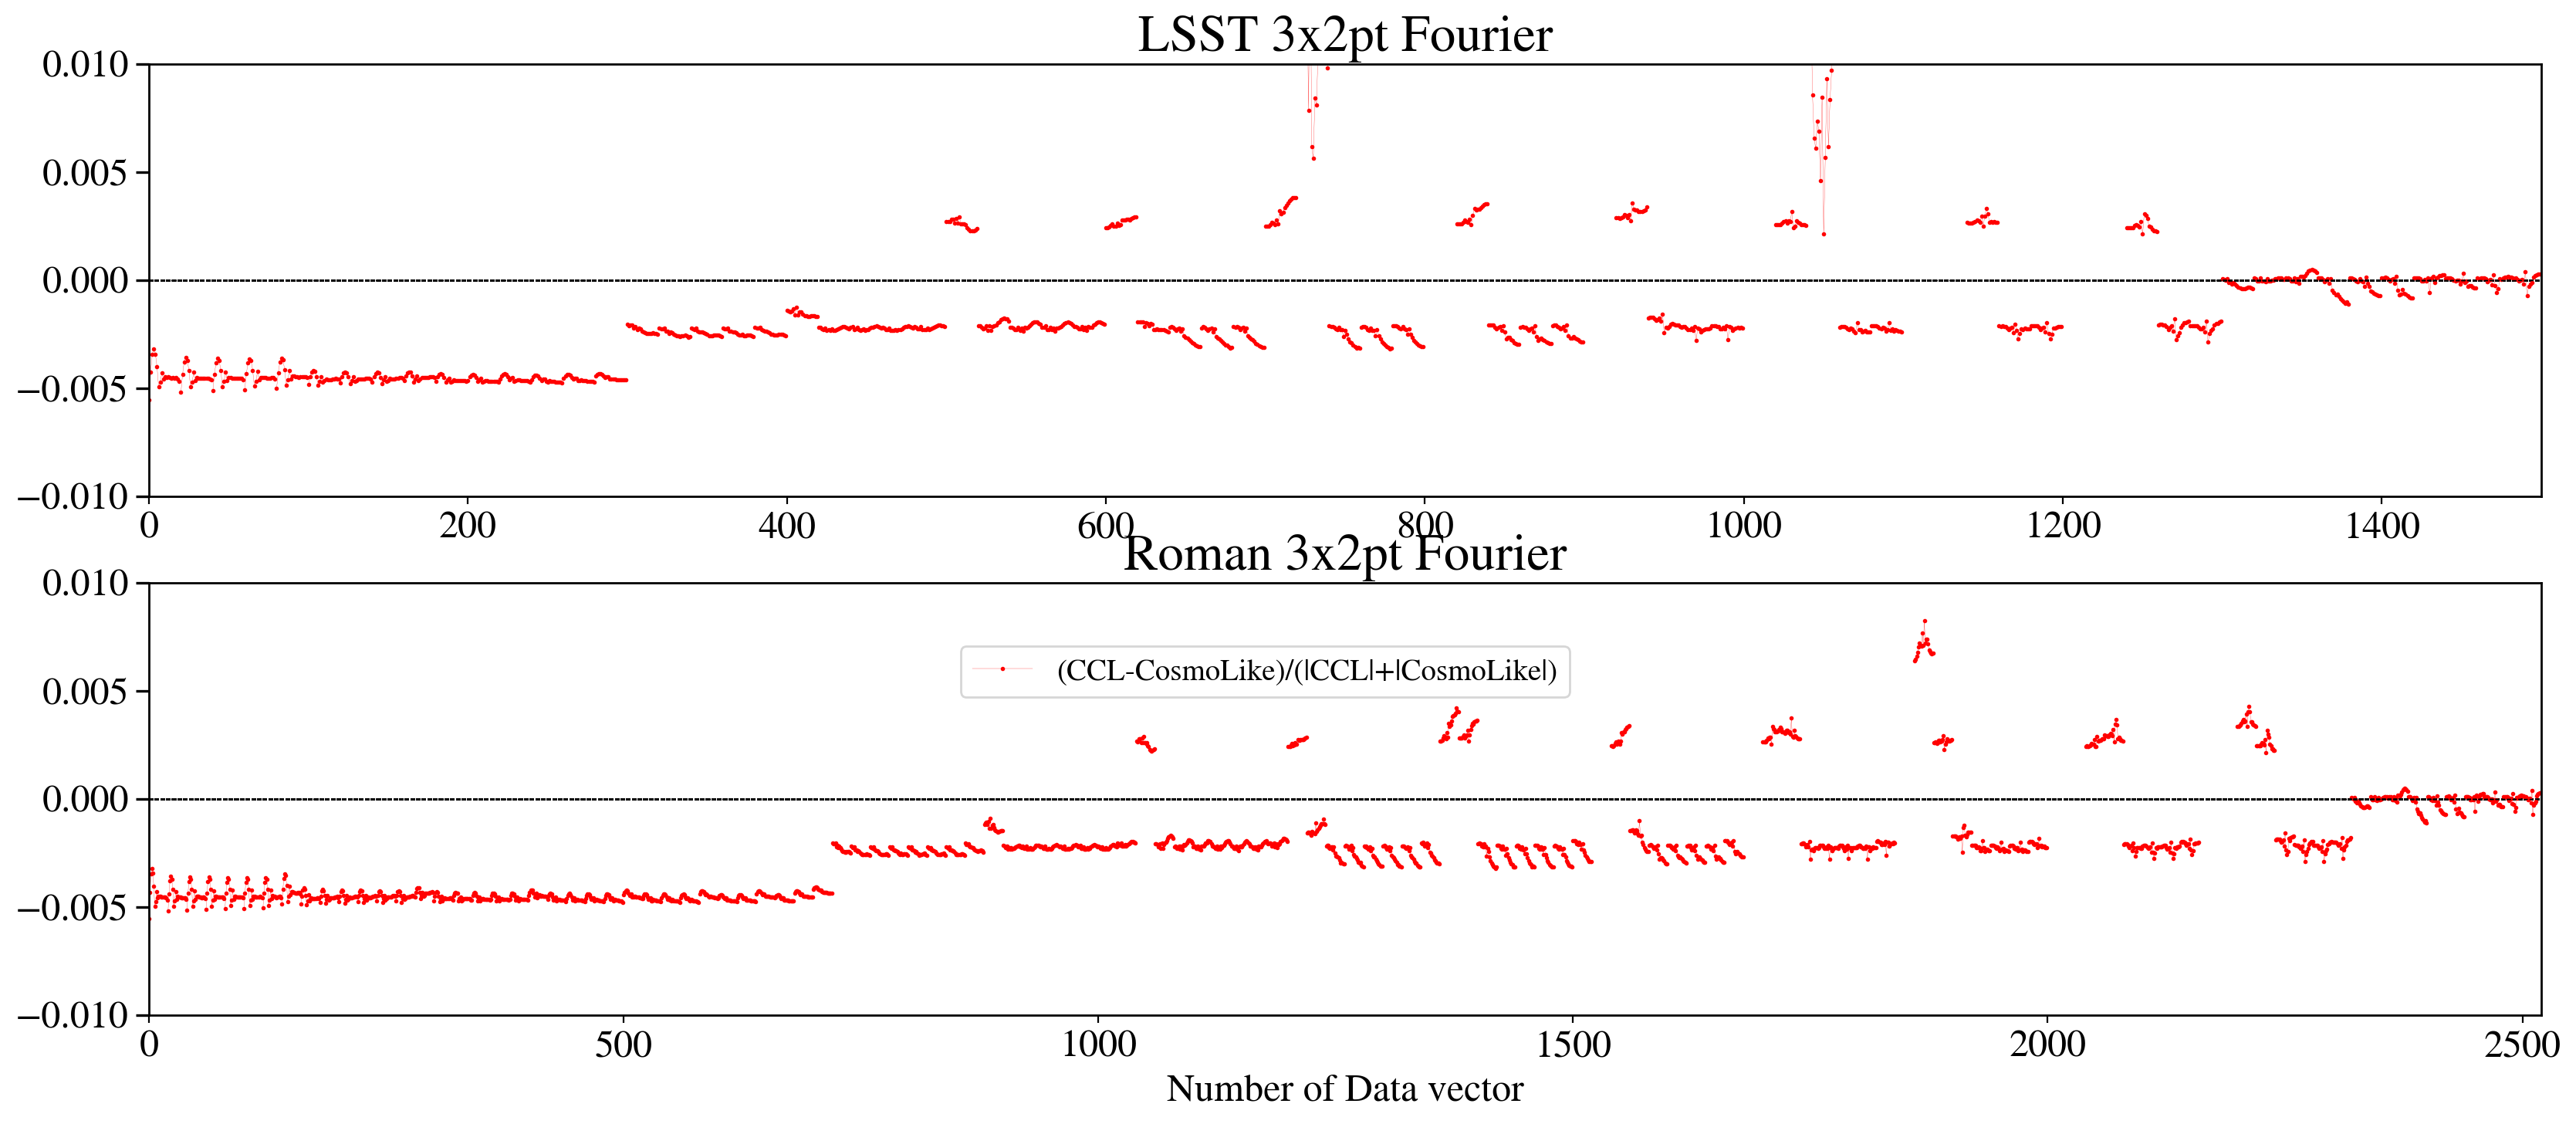

In [27]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

#load LSST data
import numpy as np

nlens = 10
nsrcs = 5
ncl=20
lmin = 20
lmax = 4000

dvF_file = '/project/chihway/junzhou/firecrown/lsst_fourier/output_factory/data_vector/firecrown_theory.txt'
dvC_file = '/project/chihway/junzhou/cocoa_approx/Cocoa/projects/lsst_fourier/chains/lsst_limber+noRSD+takahashi_evaluate/lsst_limber+noRSD+takahashi.modelvector'
#sigmas_file = './data/lsst_real/sigmas.npy'
#mask_file = './data/lsst_real/lsst_Y3.mask'

dvF = np.loadtxt(dvF_file)
dvC = np.loadtxt(dvC_file)[:,1]
#mask = np.loadtxt(mask_file)[:,1]
#sigmas = np.load(sigmas_file)

#define plot function
def plot_assemble(axs, cnt, probe, combo):
    l,r = int(cnt*ncl), int(cnt+1)*ncl
    ells = np.arange(int(cnt)*20, int(cnt+1)*20)
    delta = (dvF[l:r] - dvC[l:r])/(np.abs(dvF[l:r])+np.abs(dvC[l:r]))
    axs.plot(ells, delta, marker='o',color='r',markersize=1,linewidth=0.1)
    axs.axhline(xmin=0,xmax=1,y=0.0,color='k',linestyle='--',linewidth=0.5)

#assemble
fig,ax = plt.subplots(2,1,figsize=(20,8))
cnt = 0

#start loop
for i in range(nsrcs):
    for j in range(i, nsrcs):
        plot_assemble(ax[0], cnt, probe=r'$C_\ell^{ss}$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    for j in range(nsrcs):
        plot_assemble(ax[0], cnt, probe=r'$C_\ell^{gs}$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    plot_assemble(ax[0], cnt, probe=r'$C_\ell^{gg}$', combo=f'{i}x{i}')
    cnt+=1
    
#general settings for plot
ax[0].set_title('LSST 3x2pt Fourier')
ax[0].set_xlabel('')
ax[0].set_ylim(-0.01, 0.01)
#ax[0].yaxis.set_major_locator(MultipleLocator(0.025))
#ax[0].yaxis.set_minor_locator(MultipleLocator(0.0125))
ax[0].set_xlim(0, cnt*ncl)

#load Roman data
import numpy as np

nlens = 10
nsrcs = 8
ncl=20
lmin = 20
lmax = 4000

dvF_file = '/project/chihway/junzhou/firecrown/roman_fourier/output_factory/data_vector/firecrown_theory.txt'
dvC_file = '/project/chihway/junzhou/cocoa_approx/Cocoa/projects/roman_fourier/chains/roman_limber+noRSD+takahashi_evaluate/roman_limber+noRSD+takahashi.modelvector'
#sigmas_file = './data/roman_real/sigmas.npy'
#mask_file = './data/roman_real/roman_Y3.mask'

dvF = np.loadtxt(dvF_file)
dvC = np.loadtxt(dvC_file)[:,1]
#mask = np.loadtxt(mask_file)[:,1]
#sigmas = np.load(sigmas_file)

#restart whole process
cnt = 0

#start loop
for i in range(nsrcs):
    for j in range(i, nsrcs):
        plot_assemble(ax[1], cnt, probe=r'$C_\ell^{ss}+$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    for j in range(nsrcs):
        plot_assemble(ax[1], cnt, probe=r'$C_\ell^{gs}$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    plot_assemble(ax[1], cnt, probe=r'$C_\ell^{gg}$', combo=f'{i}x{i}')
    cnt+=1
    
#general settings for plot
ax[1].set_xlabel('Number of Data vector')
ax[1].set_title('Roman 3x2pt Fourier')
ax[1].legend(['(CCL-CosmoLike)/(|CCL|+|CosmoLike|)'],bbox_to_anchor=(0.6,0.7))
ax[1].set_ylim(-0.01, 0.01)
ax[1].set_xlim(0, cnt*ncl)
#ax[1].yaxis.set_major_locator(MultipleLocator(0.025))
#ax[1].yaxis.set_minor_locator(MultipleLocator(0.0125))

plt.savefig('data_vector_comparison4.jpg',dpi=300)
plt.show()


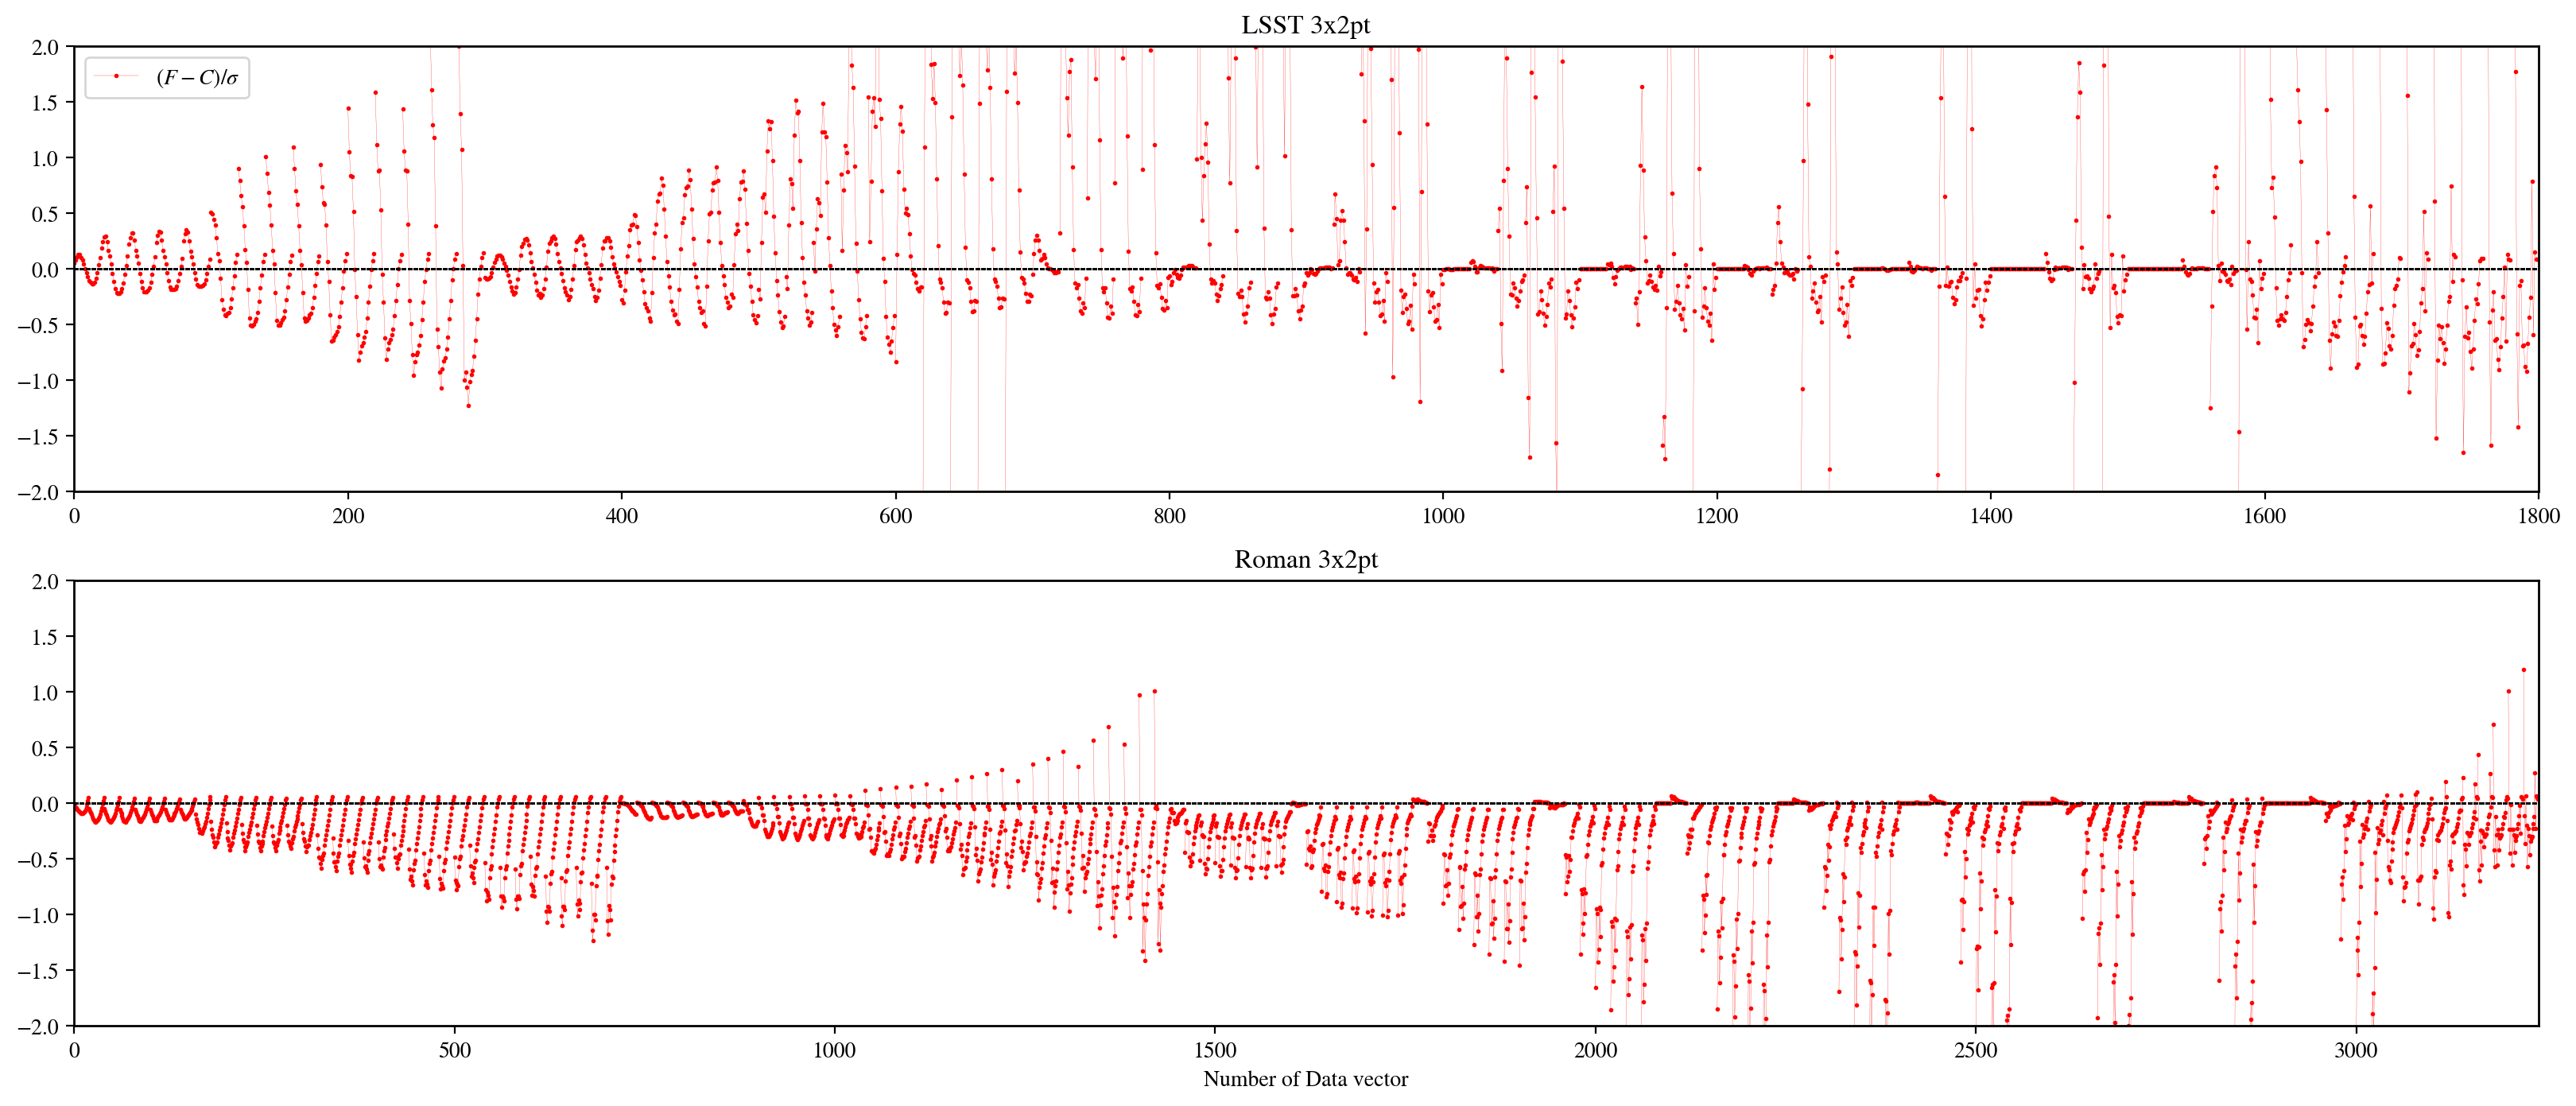

In [9]:
import matplotlib.pyplot as plt

#load LSST data
import numpy as np

nlens = 10
nsrcs = 5
ntheta=20
tmin = 1
tmax = 500

dvF_file = './data/lsst_real/firecrown_theory.txt'
dvC_file = './data/lsst_real/lsst_limber+noRSD+takahashi.modelvector'
sigmas_file = './data/lsst_real/sigmas.npy'
mask_file = './data/lsst_real/lsst_Y3.mask'

dvF = np.loadtxt(dvF_file)
dvC = np.loadtxt(dvC_file)[:,1]
mask = np.loadtxt(mask_file)[:,1]
sigmas = np.load(sigmas_file)

#define plot function
def plot_assemble(axs, cnt, probe, combo):
    l,r = int(cnt*ntheta), int(cnt+1)*ntheta
    thetas = np.arange(int(cnt)*20, int(cnt+1)*20)
    sigmas_seg = np.sqrt(sigmas[l:r])
    delta = (dvF[l:r] - dvC[l:r])/sigmas_seg
    axs.plot(thetas, delta, marker='o',color='r',markersize=1,linewidth=0.1)
    #axs.fill_between(thetas,-sigmas_seg/dvC[l:r],+sigmas_seg/dvC[l:r],step='mid',facecolor='lightgray',alpha=0.5)
    axs.axhline(xmin=0,xmax=1,y=0.0,color='k',linestyle='--',linewidth=0.5)
    axs.set_ylim(-2, 2)

#assemble
fig,ax = plt.subplots(2,1,figsize=(20,8))
cnt = 0

#initiate legends
l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
plot_assemble(ax[0], cnt, probe=r'$\xi^+$', combo=f'{i}x{j}')
cnt+=1
ax[0].legend([r'$(F-C)/\sigma$'])

#start loop
for i in range(nsrcs):
    for j in range(i, nsrcs):
        if(i==0 and j==0):
            continue
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0], cnt, probe=r'$\xi^+$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nsrcs):
    for j in range(i, nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0], cnt, probe=r'$\xi^-$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    for j in range(nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0], cnt, probe=r'$\gamma t$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
    plot_assemble(ax[0], cnt, probe=r'$W(\theta)$', combo=f'{i}x{i}')
    cnt+=1
    
#general settings for plot
ax[0].set_title('LSST 3x2pt')
ax[0].set_xlabel('')
ax[0].set_ylim(-2, 2)
ax[0].set_xlim(0, cnt*ntheta)

#load Roman data
import numpy as np

nlens = 10
nsrcs = 8
ntheta=20
tmin = 1
tmax = 500

dvF_file = './data/roman_real/firecrown_theory.txt'
dvC_file = './data/roman_real/roman_limber+noRSD+takahashi.modelvector'
sigmas_file = './data/roman_real/sigmas.npy'
mask_file = './data/roman_real/roman_Y3.mask'

dvF = np.loadtxt(dvF_file)
dvC = np.loadtxt(dvC_file)[:,1]
mask = np.loadtxt(mask_file)[:,1]
sigmas = np.load(sigmas_file)

#restart whole process
cnt = 0

#start loop
for i in range(nsrcs):
    for j in range(i, nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1], cnt, probe=r'$\xi^+$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nsrcs):
    for j in range(i, nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1], cnt, probe=r'$\xi^-$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    for j in range(nsrcs):
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1], cnt, probe=r'$\gamma t$', combo=f'{i}x{j}')
        cnt+=1
for i in range(nlens):
    l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
    plot_assemble(ax[1], cnt, probe=r'$W(\theta)$', combo=f'{i}x{i}')
    cnt+=1
    
#general settings for plot
ax[1].set_xlabel('Number of Data vector')
ax[1].set_title('Roman 3x2pt')
ax[1].set_ylim(-2, 2)
ax[1].set_xlim(0, cnt*ntheta)

plt.show()


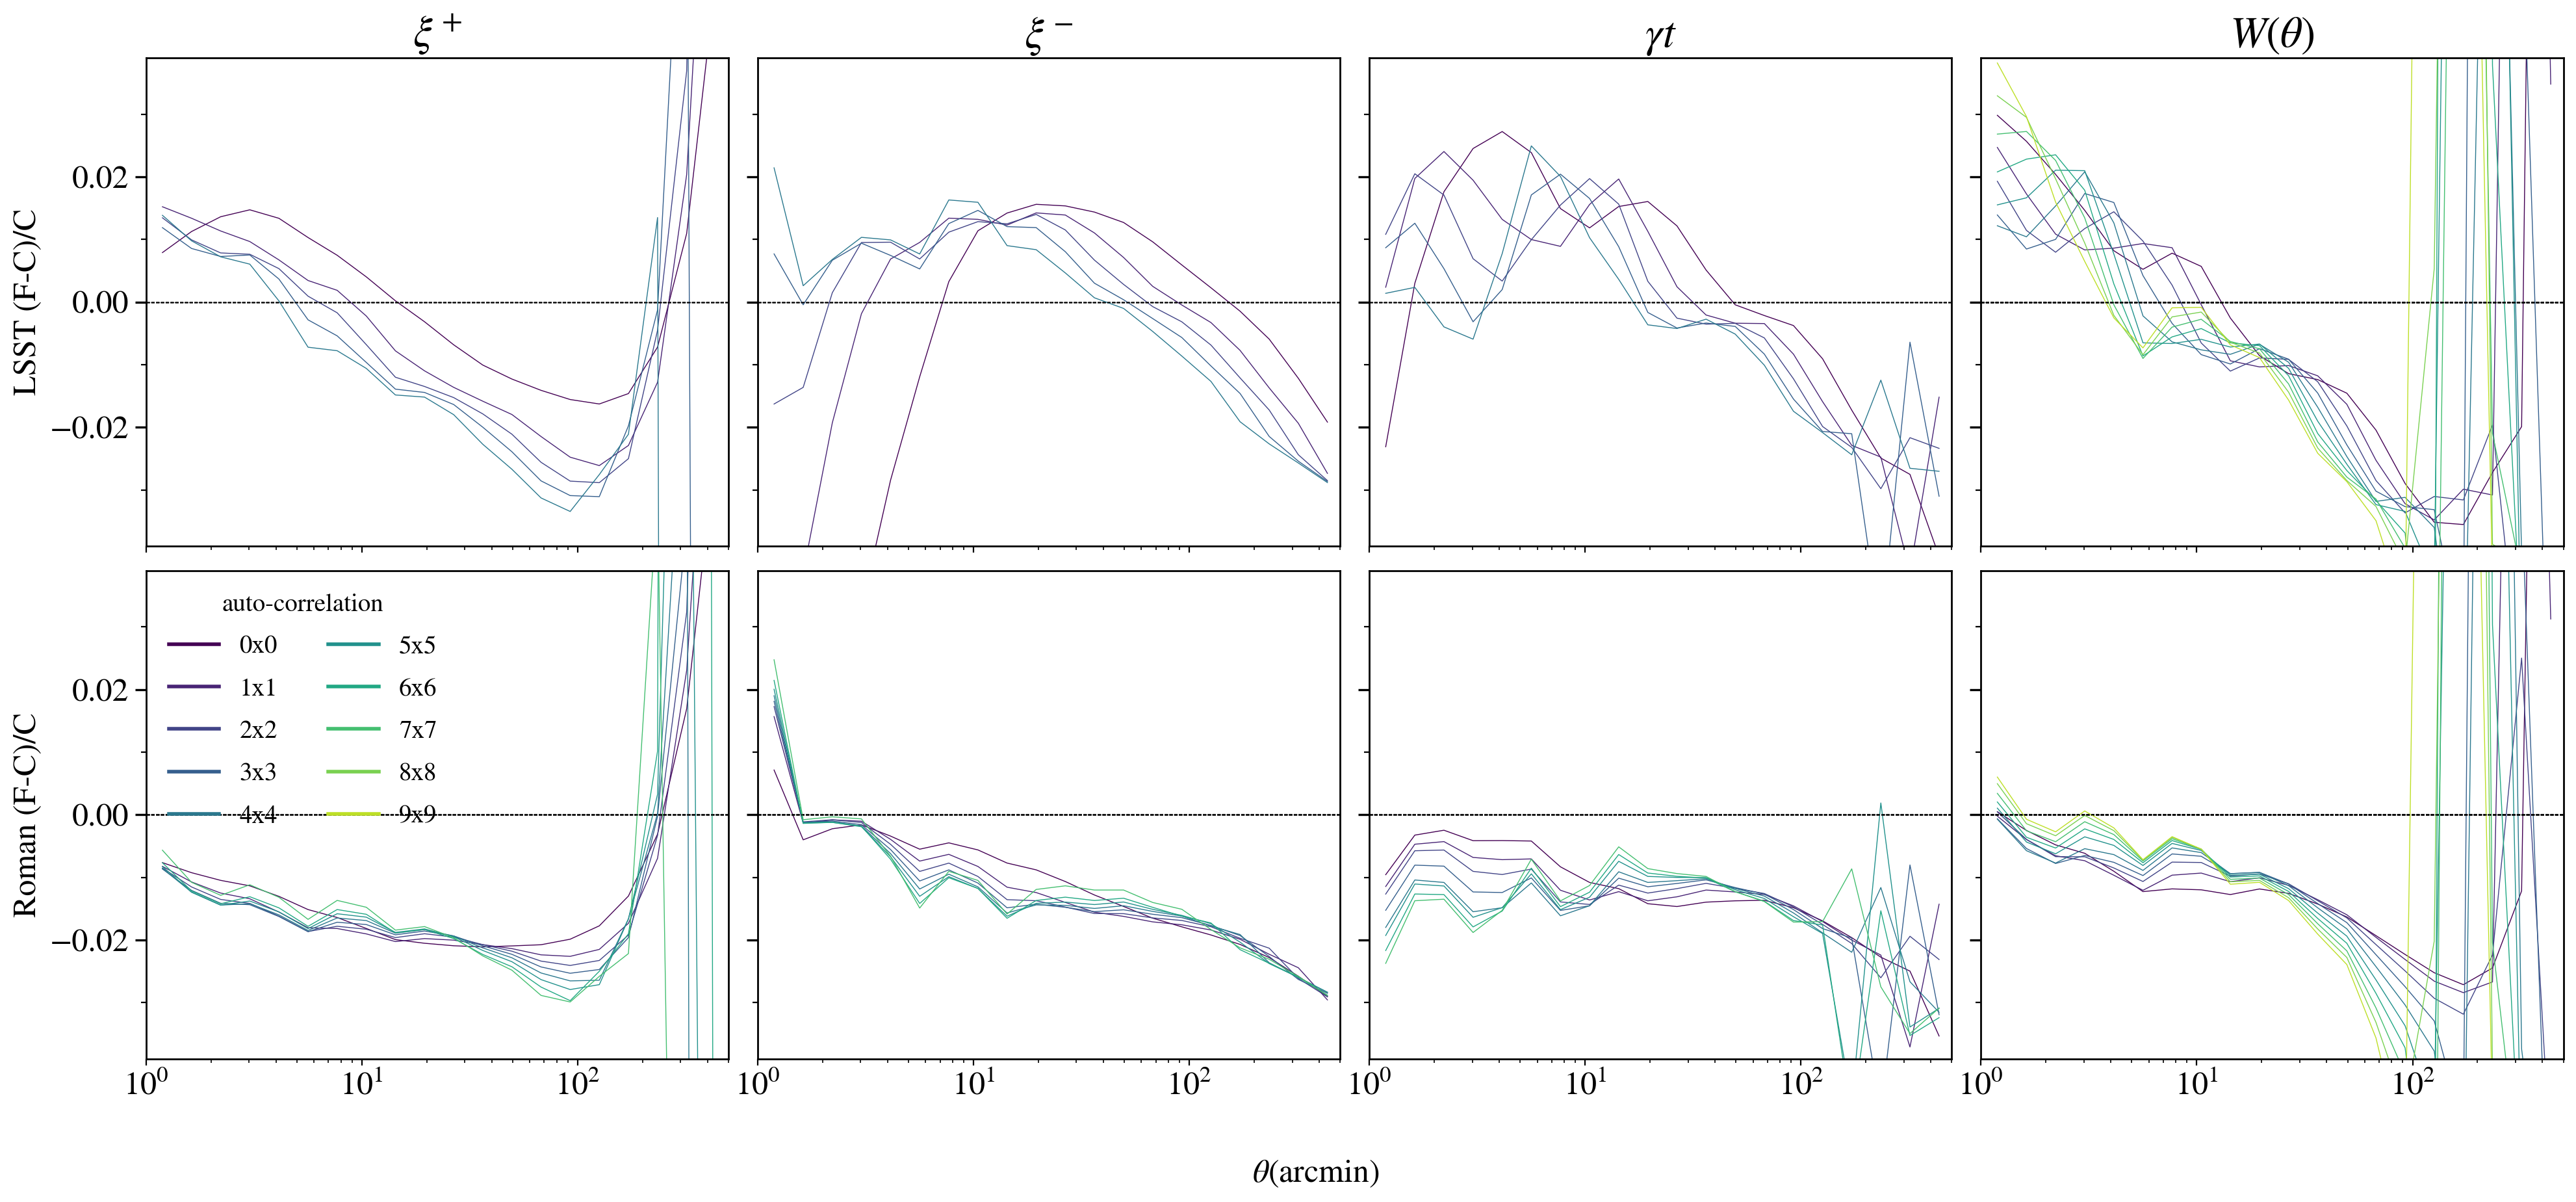

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator

#load LSST data
import numpy as np

nlens = 10
nsrcs = 5
ntheta=20
tmin = 1
tmax = 500

#thetas used in COCOA
vmin = tmin
vmax = tmax
N = ntheta
logdt = (np.log(vmax) - np.log(vmin))/N
fac = (2./3.)
thetas = []
for i in range(int(N)):
    thetamin = np.exp(np.log(vmin) + (i + 0.)*logdt)
    thetamax = np.exp(np.log(vmin) + (i + 1.)*logdt)
    thetas.append(fac * (thetamax**3 - thetamin**3) / (thetamax**2 - thetamin**2))
thetas = np.array(thetas)

dvF_file = './data/lsst_real/firecrown_theory.txt'
dvC_file = './data/lsst_real/lsst_limber+noRSD+takahashi.modelvector'
sigmas_file = './data/lsst_real/sigmas.npy'
mask_file = './data/lsst_real/lsst_Y3.mask'

dvF = np.loadtxt(dvF_file)
dvC = np.loadtxt(dvC_file)[:,1]
mask = np.loadtxt(mask_file)[:,1]

#define plot function
def plot_assemble(axs, cnt, probe, combo, color):
    l,r = int(cnt*ntheta), int(cnt+1)*ntheta
    delta = (dvF[l:r] - dvC[l:r])
    axs.plot(thetas, delta/dvC[l:r],markersize=1,linewidth=0.5,label=combo,color=color)
    #axs.fill_between(thetas,-sigmas/dvC[l:r],+sigmas/dvC[l:r],step='mid',facecolor='lightgray',alpha=0.5)
    axs.axhline(xmin=0,xmax=1,y=0.0,color='k',linestyle='--',linewidth=0.5)
    #axs.set_ylim(-2, 2)
    axs.set_xscale('log')

from matplotlib.lines import Line2D

#assemble
fig,ax = plt.subplots(2,4,figsize=(24,10))
plt.subplots_adjust(hspace=0.05)
plt.subplots_adjust(wspace=0.05)
cmap = plt.get_cmap("viridis")
colors = cmap(np.arange(0, nlens)/nlens)
patches = [
    Line2D( [0],[0], color=colors[i], lw=2, ls='-', label=f"{i}x{i}")
    for i in range(nlens)
]

cnt = 0
for i in range(len(ax[0])):
    ax[0,i].yaxis.set_major_locator(MultipleLocator(0.02))
    ax[0,i].yaxis.set_minor_locator(MultipleLocator(0.01))
ax[0,0].set_ylabel('LSST (F-C)/C')
ax[0,0].set_title(r'$\xi^+$')
ax[0,1].set_title(r'$\xi^-$')
ax[0,2].set_title(r'$\gamma t$')
ax[0,3].set_title(r'$W(\theta)$')
ax[0,0].tick_params(axis='x', labelbottom=False)
ax[0,1].tick_params(axis='x', labelbottom=False)
ax[0,2].tick_params(axis='x', labelbottom=False)
ax[0,3].tick_params(axis='x', labelbottom=False)
ax[0,1].tick_params(axis='y', labelleft=False)
ax[0,2].tick_params(axis='y', labelleft=False)
ax[0,3].tick_params(axis='y', labelleft=False)
ax[0,0].set_xlim(1,500)
ax[0,1].set_xlim(1,500)
ax[0,2].set_xlim(1,500)
ax[0,3].set_xlim(1,500)
ax[0,0].set_ylim(-0.039,0.039)
ax[0,1].set_ylim(-0.039,0.039)
ax[0,2].set_ylim(-0.039,0.039)
ax[0,3].set_ylim(-0.039,0.039)

#start loop
for i in range(nsrcs):
    for j in range(i, nsrcs):
        if i!=j:
            cnt+=1
            continue
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0,0], cnt, probe=r'$\xi^+$', combo=f'{i}x{j}',color=cmap(i/nlens))
        cnt+=1
for i in range(nsrcs):
    for j in range(i, nsrcs):
        if i!=j:
            cnt+=1
            continue
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0,1], cnt, probe=r'$\xi^-$', combo=f'{i}x{j}',color=cmap(i/nlens))
        cnt+=1
for i in range(nlens):
    for j in range(nsrcs):
        if i!=j:
            cnt+=1
            continue
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0,2], cnt, probe=r'$\gamma t$', combo=f'{i}x{j}',color=cmap(i/nlens))
        cnt+=1
for i in range(nlens):
    l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
    plot_assemble(ax[0,3], cnt, probe=r'$W(\theta)$', combo=f'{i}x{i}',color=cmap(i/nlens))
    cnt+=1

nlens = 10
nsrcs = 8
ntheta=20
tmin = 1
tmax = 500

dvF_file = './data/roman_real/firecrown_theory.txt'
dvC_file = './data/roman_real/roman_limber+noRSD+takahashi.modelvector'
sigmas_file = './data/roman_real/sigmas.npy'
mask_file = './data/roman_real/roman_Y3.mask'

dvF = np.loadtxt(dvF_file)
dvC = np.loadtxt(dvC_file)[:,1]
mask = np.loadtxt(mask_file)[:,1]

cnt = 0
for i in range(len(ax[0])):
    ax[1,i].yaxis.set_major_locator(MultipleLocator(0.02))
    ax[1,i].yaxis.set_minor_locator(MultipleLocator(0.01))
ax[1,0].set_ylabel('Roman (F-C)/C')
ax[1,1].tick_params(axis='y', labelleft=False)
ax[1,2].tick_params(axis='y', labelleft=False)
ax[1,3].tick_params(axis='y', labelleft=False)
ax[1,0].set_xlim(1,500)
ax[1,1].set_xlim(1,500)
ax[1,2].set_xlim(1,500)
ax[1,3].set_xlim(1,500)
ax[1,0].set_ylim(-0.039,0.039)
ax[1,1].set_ylim(-0.039,0.039)
ax[1,2].set_ylim(-0.039,0.039)
ax[1,3].set_ylim(-0.039,0.039)

#start loop
for i in range(nsrcs):
    for j in range(i, nsrcs):
        if i!=j:
            cnt+=1
            continue
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1,0], cnt, probe=r'$\xi^+$', combo=f'{i}x{j}',color=cmap(i/nlens))
        cnt+=1
for i in range(nsrcs):
    for j in range(i, nsrcs):
        if i!=j:
            cnt+=1
            continue
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1,1], cnt, probe=r'$\xi^-$', combo=f'{i}x{j}',color=cmap(i/nlens))
        cnt+=1
for i in range(nlens):
    for j in range(nsrcs):
        if i!=j:
            cnt+=1
            continue
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[1,2], cnt, probe=r'$\gamma t$', combo=f'{i}x{j}',color=cmap(i/nlens))
        cnt+=1
for i in range(nlens):
    l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
    plot_assemble(ax[1,3], cnt, probe=r'$W(\theta)$', combo=f'{i}x{i}',color=cmap(i/nlens))
    cnt+=1

ax[1,0].legend(handles=patches, title="auto-correlation", ncol=2, frameon=False,title_fontsize=14)
fig.supxlabel(r'$\theta(\mathrm{arcmin})$', fontsize=18)
plt.savefig('data_vector_coomparison_v3.jpg', dpi=300)

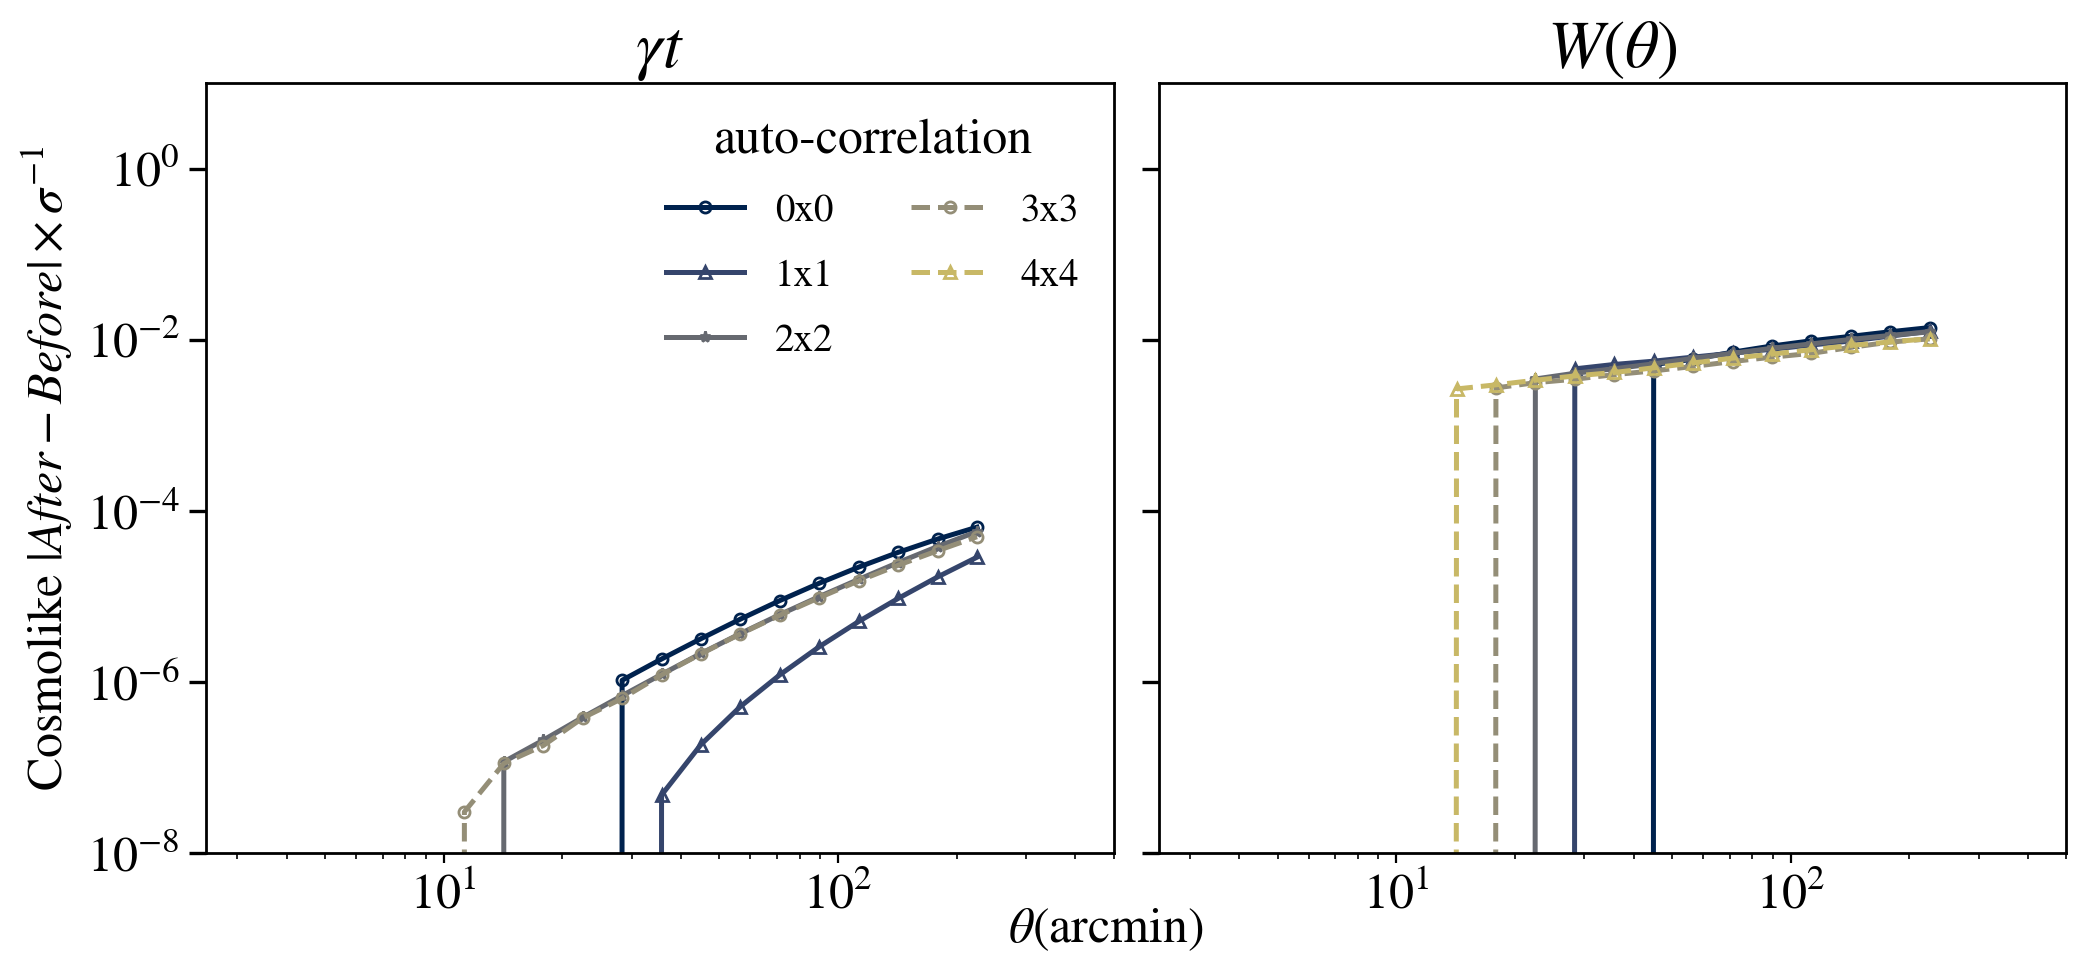

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import itertools
#load LSST data
import numpy as np

def make_style_iter():
    linestyles = ['-', '--', '-.', ':']
    #markers    = ['o', 's', '^', 'D', 'v', 'P', 'X', '*']
    markers = ['o', '^', '*']
    linewidths = [1.8, 2.6]
    return itertools.cycle(itertools.product(linewidths, linestyles, markers, ))


nlens = 5
nsrcs = 4
ntheta=20
tmin = 2.5
tmax = 250

#thetas used in COCOA
vmin = tmin
vmax = tmax
N = ntheta
logdt = (np.log(vmax) - np.log(vmin))/N
fac = (2./3.)
thetas = []
for i in range(int(N)):
    thetamin = np.exp(np.log(vmin) + (i + 0.)*logdt)
    thetamax = np.exp(np.log(vmin) + (i + 1.)*logdt)
    thetas.append(fac * (thetamax**3 - thetamin**3) / (thetamax**2 - thetamin**2))
thetas = np.array(thetas)

dvF_file = './data/desy3_fixed.modelvector'
dvC_file = './data/desy3.modelvector'
covs_file = './data/des_y3_cov_unblinded_final.txt'
mask_file = './data/3x2pt_baseline.mask'

dvF = np.loadtxt(dvF_file)[:,1]
dvC = np.loadtxt(dvC_file)[:,1]
mask = np.loadtxt(mask_file)[:,1]
covs_raw = np.loadtxt(covs_file)
sigmas = np.ones(len(mask))
for i in range(len(covs_raw)):
    ii = int(covs_raw[i, 0])
    jj = int(covs_raw[i, 1])
    element = covs_raw[i, 2]
    if ii==jj:
        sigmas[int(ii)] = element


#define plot function
def plot_assemble(axs, cnt, probe, combo, color,ls,mk,lw):
    l,r = int(cnt*ntheta), int(cnt+1)*ntheta
    delta = np.abs(dvF[l:r] - dvC[l:r])/np.sqrt(sigmas[l:r])
    (ln, ) = axs.plot(thetas, delta,markersize=4.0,label=combo,color=color,linestyle=ls,linewidth=lw,marker=mk,markerfacecolor='none')
    axs.axhline(xmin=0,xmax=1,y=0.0,color='k',linestyle='-')
    axs.set_xscale('log')
    return ln

from matplotlib.lines import Line2D

#assemble
fig,ax = plt.subplots(1,2,figsize=(12,5))
plt.subplots_adjust(hspace=0.05)
plt.subplots_adjust(wspace=0.05)
cmap = plt.get_cmap("cividis")
colors = cmap(np.arange(0, nlens)/nlens)

cnt = 0
#for i in range(len(ax)):
#    ax[i].yaxis.set_major_locator(MultipleLocator(1.0))
#    ax[i].yaxis.set_minor_locator(MultipleLocator(0.5))
ax[0].set_ylabel(r'Cosmolike $|After-Before|\times\sigma^{-1}$')
ax[0].set_title(r'$\gamma t$')
ax[1].set_title(r'$W(\theta)$')
ax[1].tick_params(axis='y', labelleft=False)
ax[0].set_xlim(2.5,500)
ax[1].set_xlim(2.5,500)
ax[0].set_ylim(1e-8,10)
ax[1].set_ylim(1e-8,10)
ax[0].set_yscale('log')
ax[1].set_yscale('log')


#start loop
styles = make_style_iter()
for i in range(nsrcs):
    for j in range(i, nsrcs):
        if i!=j:
            cnt+=1
            continue
        lw,ls,mk = next(styles)
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        #plot_assemble(ax[0], cnt, probe=r'$\xi^+$', combo=f'{i}x{j}',color=cmap(i/nlens),ls=ls,lw=lw,mk=mk)
        cnt+=1
styles = make_style_iter()
for i in range(nsrcs):
    for j in range(i, nsrcs):
        if i!=j:
            cnt+=1
            continue
        lw,ls,mk = next(styles)
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        #plot_assemble(ax[1], cnt, probe=r'$\xi^-$', combo=f'{i}x{j}',color=cmap(i/nlens),ls=ls,lw=lw,mk=mk)
        cnt+=1
styles = make_style_iter()
for i in range(nlens):
    for j in range(nsrcs):
        if i!=j:
            cnt+=1
            continue
        lw,ls,mk = next(styles)
        l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
        plot_assemble(ax[0], cnt, probe=r'$\gamma t$', combo=f'{i}x{j}',color=cmap(i/nlens),ls=ls,lw=lw,mk=mk)
        cnt+=1
styles = make_style_iter()
lines = []
for i in range(nlens):
    lw,ls,mk = next(styles)
    l,r = int(cnt*ntheta),int((cnt+1)*ntheta)
    ln = plot_assemble(ax[1], cnt, probe=r'$W(\theta)$', combo=f'{i}x{i}',color=cmap(i/nlens),ls=ls,lw=lw,mk=mk)
    lines.append(ln)
    cnt+=1

ax[0].legend(handles=lines, title="auto-correlation", ncol=2, frameon=False,title_fontsize=18)
fig.supxlabel(r'$\theta(\mathrm{arcmin})$', fontsize=18)
plt.savefig('desy3_data_vector_coomparison.jpg', dpi=300)